In [1]:
import urllib
import urllib.request
import json

import pandas as pd
import numpy as np

In [2]:
binance_base = "https://<>.binance.com"
binance_subdomains = ["api", "api1", "api2", "api3"]

binance_url = binance_base.replace('<>', binance_subdomains[0])

binance_endpoints = {
    'ping': ('GET', '/api/v3/ping'),
    'server_time': ('GET', '/api/v3/time'),
    'exchange_info': ('GET', '/api/v3/exchangeInfo'),
    'order_book': ('GET', '/api/v3/depth', {'symbol': True, 'limit': False}),
    'recent_trades': ('GET', '/api/v3/trades', {'symbol': True, 'limit': False}),
    'average_price': ('GET', '/api/v3/avgPrice', {'symbol': True}),
    'price': ('GET', '/api/v3/ticker/price', {'symbol': False}),
    'best_book_price': ('GET', '/api/v3/ticker/bookTicker', {'symbol': False})
}

In [3]:
binance_uri = binance_url + binance_endpoints['exchange_info'][1]

web_url = urllib.request.urlopen(binance_uri)
data = web_url.read()
encoding = web_url.info().get_content_charset('utf-8')
JSON_object = json.loads(data.decode(encoding))

df_symbols = pd.DataFrame(JSON_object['symbols'])
df_symbols = df_symbols[df_symbols['status']=='TRADING']

In [30]:
df_symbols.head()

,symbol,status,baseAsset,baseAssetPrecision,quoteAsset,quotePrecision,quoteAssetPrecision,baseCommissionPrecision,quoteCommissionPrecision,orderTypes,icebergAllowed,ocoAllowed,quoteOrderQtyMarketAllowed,isSpotTradingAllowed,isMarginTradingAllowed,filters,permissions
0,ETHBTC,TRADING,ETH,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",True,True,True,True,True,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...","[SPOT, MARGIN]"
1,LTCBTC,TRADING,LTC,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",True,True,True,True,True,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...","[SPOT, MARGIN]"
2,BNBBTC,TRADING,BNB,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",True,True,True,True,True,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...","[SPOT, MARGIN]"
3,NEOBTC,TRADING,NEO,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",True,True,True,True,True,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...","[SPOT, MARGIN]"
4,QTUMETH,TRADING,QTUM,8,ETH,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT]


In [4]:
# market cap
binance_uri = "https://www.binance.com/exchange-api/v2/public/asset-service/product/get-products"
web_url = urllib.request.urlopen(binance_uri)
data = web_url.read()
encoding = web_url.info().get_content_charset('utf-8')
JSON_object = json.loads(data.decode(encoding))
df_market = pd.DataFrame(JSON_object['data'])
df_market['c'] = df_market['c'].astype(float)
df_market['market_cap'] = df_market['cs'].fillna(0).astype(float)*df_market['c'].fillna(0)
df_market = df_market[df_market['market_cap']>0]
df_market.sort_values(by='market_cap', ascending=False)

,s,st,b,q,ba,qa,i,ts,an,qn,...,y,as,pm,pn,cs,tags,pom,pomt,etf,market_cap
199,BTCIDRT,TRADING,BTC,IDRT,฿,,0.00000100,1,Bitcoin,Rupiah Token,...,0,7.172986e+00,FIAT,FIAT,1.870942e+07,"[pow, mining-zone]",False,None,False,1.423536e+16
193,BTCBIDR,TRADING,BTC,BIDR,฿,,0.00000100,1,Bitcoin,BIDR,...,0,6.752505e+01,FIAT,FIAT,1.870942e+07,"[pow, mining-zone]",False,None,False,1.420119e+16
393,ETHBIDR,TRADING,ETH,BIDR,Ξ,,0.00001000,1,Ethereum,BIDR,...,0,1.324939e+03,FIAT,FIAT,1.158622e+08,"[pow, mining-zone]",False,None,False,6.979648e+15
893,USDTBVND,TRADING,USDT,BVND,,,0.01000000,1,TetherUS,BVND,...,0,2.625804e+05,FIAT,FIAT,5.775589e+10,[],False,None,False,1.401273e+15
180,BNBIDRT,TRADING,BNB,IDRT,,,0.00100000,1,BNB,Rupiah Token,...,0,9.957830e+02,FIAT,FIAT,1.526659e+08,"[pos, mining-zone, BSC]",False,None,False,1.393816e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,YOYOBTC,TRADING,YOYO,BTC,,฿,1.00000000,0.00000001,YOYOW,Bitcoin,...,0,1.586661e+07,BTC,BTC,4.966474e+08,"[pow, mining-zone]",False,None,False,3.327538e+02
691,POABTC,TRADING,POA,BTC,,฿,1.00000000,0.00000001,POA Network,Bitcoin,...,0,7.152141e+06,BTC,BTC,2.201676e+08,"[pos, mining-zone]",False,None,False,3.236464e+02
685,PHBBTC,TRADING,PHB,BTC,,฿,1.00000000,0.00000001,Phoenix Global,Bitcoin,...,0,1.309873e+08,BTC,BTC,8.295887e+08,[],False,None,False,2.820602e+02
77,AMBBTC,TRADING,AMB,BTC,,฿,1.00000000,0.00000001,Ambrosus,Bitcoin,...,0,1.410152e+07,BTC,BTC,1.820498e+08,"[pos, mining-zone]",False,None,False,2.585106e+02


<AxesSubplot:>

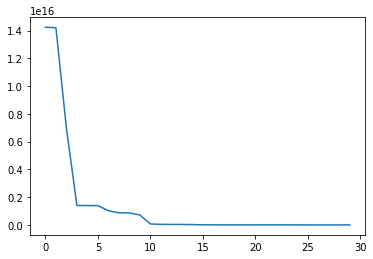

In [5]:
df_market['market_cap'].sort_values(ascending=False).reset_index(drop=True)[:30].plot()

In [6]:
import asyncio
import aiohttp
from aiohttp import ClientSession

async def get_symbol_trades_stats(symbol):
    binance_uri = binance_url + binance_endpoints['recent_trades'][1] + f'?symbol={symbol}'
    async with ClientSession() as session:
        res = await session.request(method="GET", url=binance_uri)
        res_json = await res.text()
        JSON_object = json.loads(res_json)
    df_recent_trades = pd.DataFrame(JSON_object)
    mean_time = df_recent_trades['time'].diff().mean()
    return mean_time

In [7]:
result = []

for sym in df_symbols['symbol'].to_list():
    res = await get_symbol_trades_stats(sym)
    result.append({'symbol': sym, 'average_trade_time': res})
    
df_trade_times = pd.DataFrame(result)

df_trade_times['market_cap'] = np.NaN
df_market_caps = df_market.set_index('s').loc[df_trade_times[df_trade_times['symbol'].isin(df_market['s'])]['symbol'], 'market_cap']
market_caps = df_market_caps.values
idx = df_market_caps.index

df_trade_times = df_trade_times.set_index('symbol')
df_trade_times.loc[idx, 'market_cap'] = market_caps

<AxesSubplot:xlabel='symbol'>

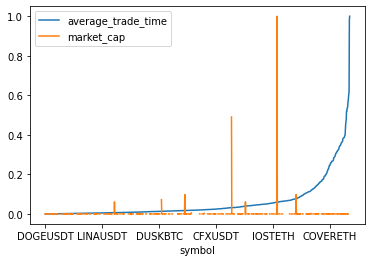

In [8]:
df_trade_times.sort_values('average_trade_time').apply(lambda x: x/x.max(), axis=0).plot()

<AxesSubplot:xlabel='symbol'>

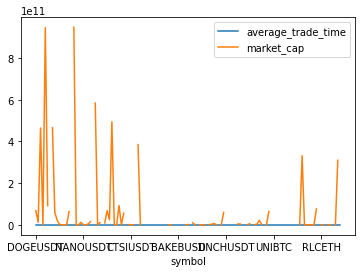

In [9]:
df_trade_times[df_trade_times['average_trade_time']<1000].sort_values('average_trade_time').plot()

In [18]:
df_trade_times["average_trade_time"].sort_values().median()

6700.2134268537075

In [49]:
selected_symbols = df_trade_times[(df_trade_times["average_trade_time"] > 6500) & (df_trade_times["average_trade_time"] < 6800)].index

In [51]:
selected_assets = list(set(df_symbols.set_index("symbol").loc[selected_symbols, ["baseAsset","quoteAsset"]].values.reshape(1,-1).tolist()[0]))

In [56]:
",".join(selected_assets)

'DOGE,BUSD,DIA,USDT,SWRV,MDA,NXS,BNB,WBTC,DASH,SUN,SRM,DNT,1INCH,FORTH,FIS,BTC,LINKUP,ETH,EOS,EUR,AUD'